<a href="https://colab.research.google.com/github/4drno/Tratamento-de-Dados-Reposit-rio-PBD-SIAc-UFRJ/blob/main/Repositorio_SIAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tratamento Inicial dos dados

In [55]:
import pandas as pd

In [56]:
arquivos = ['CCMN_dados_completos_corrigido.csv',
'CCS_dados_completos_corrigido.csv',
'CT_dados_completos_corrigido.csv',
'Ciencia_e_Cultura_corrigido.csv',
'Ciencias_Juridicas_e_Economicas_corrigido.csv',
'Duque_de_Caxias_corrigido.csv',
'Filosofia_e_Ciencias_Humanas_corrigido.csv',
'Letras_e_Artes_corrigido.csv',
'Macae_dados_completos_corrigido.csv']

nomes_centros = ['CCMN',
'CCS',
'CT',
'Ciencia_e_Cultura',
'Ciencias_Juridicas_e_Economicas',
'Duque_de_Caxias',
'Filosofia_e_Ciencias_Humanas',
'Letras_e_Artes',
'Macae']

tabelas = []

for arq in arquivos:
  print(f'https://raw.githubusercontent.com/4drno/Tratamento-de-Dados-Reposit-rio-PBD-SIAc-UFRJ/refs/heads/main/{arq}')
  tabelas.append(pd.read_csv(
      f'https://raw.githubusercontent.com/4drno/Tratamento-de-Dados-Reposit-rio-PBD-SIAc-UFRJ/refs/heads/main/{arq}',
      sep = ';'))

https://raw.githubusercontent.com/4drno/Tratamento-de-Dados-Reposit-rio-PBD-SIAc-UFRJ/refs/heads/main/CCMN_dados_completos_corrigido.csv
https://raw.githubusercontent.com/4drno/Tratamento-de-Dados-Reposit-rio-PBD-SIAc-UFRJ/refs/heads/main/CCS_dados_completos_corrigido.csv
https://raw.githubusercontent.com/4drno/Tratamento-de-Dados-Reposit-rio-PBD-SIAc-UFRJ/refs/heads/main/CT_dados_completos_corrigido.csv
https://raw.githubusercontent.com/4drno/Tratamento-de-Dados-Reposit-rio-PBD-SIAc-UFRJ/refs/heads/main/Ciencia_e_Cultura_corrigido.csv
https://raw.githubusercontent.com/4drno/Tratamento-de-Dados-Reposit-rio-PBD-SIAc-UFRJ/refs/heads/main/Ciencias_Juridicas_e_Economicas_corrigido.csv
https://raw.githubusercontent.com/4drno/Tratamento-de-Dados-Reposit-rio-PBD-SIAc-UFRJ/refs/heads/main/Duque_de_Caxias_corrigido.csv
https://raw.githubusercontent.com/4drno/Tratamento-de-Dados-Reposit-rio-PBD-SIAc-UFRJ/refs/heads/main/Filosofia_e_Ciencias_Humanas_corrigido.csv
https://raw.githubusercontent.com

In [57]:
df = pd.concat(
    tabelas,
    keys = nomes_centros
).reset_index(level=0).rename(columns={"level_0": "centro"})

df.head()

,centro,Local,Data,Horário,ID do Trabalho,Título,Autor(es),Orientador(es),Resumo
0,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,22 Sep / SEG,09:00 às 12:00h,277,DINÂMICA ESTOCÁSTICA E O MOVIMENTO BROWNIANO,FERNANDO NICACIO,LUZIA VITÓRIA DO NASCIMENTO RODRIGUES DIAS,Processos termodinâmicos que ocorrem em sistem...
1,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,22 Sep / SEG,09:00 às 12:00h,1261,Galáxias como ferramentas cosmológicas:alinham...,ARIANNA CORTESI; PEDRO DA SILVEIRA FERREIRA,RAFAEL OLIVEIRA RAMOS,NaN
2,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,22 Sep / SEG,09:00 às 12:00h,1295,MODIFICAÇÃO DA GRAVIDADE POR HU−SAWICKI,GABRIELLE VASCONCELOS DE MENDONÇA PENHA; JULIA...,SERGIO E. JORAS,NaN
3,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,22 Sep / SEG,09:00 às 12:00h,1336,UMA TEORIA PARA MODIFICAÇÃO DE GRAVIDADE POR S...,GABRIELLE VASCONCELOS DE MENDONÇA PENHA; JULIA...,SERGIO E. JORAS,NaN
4,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,22 Sep / SEG,09:00 às 12:00h,1442,GAMA−GRAVITY: UMA TEORIA PARA GRAVIDADE MODIFI...,GABRIELLE VASCONCELOS DE MENDONÇA PENHA; JULIA...,SERGIO E. JORAS,NaN


A base de dados possui 5210 linhas e 9 colunas

In [58]:
df.shape

(5210, 9)

Verificando dados faltantes

In [59]:
df.isna().sum()

,0
centro,0
Local,4
Data,0
Horário,0
ID do Trabalho,0
Título,0
Autor(es),0
Orientador(es),0
Resumo,637


4 apresentações não possuem local, todas no mesmo horário e data no ccmn. Vamos remover essas linhas dos dados

In [60]:
df[df['Local'].isna()]

,centro,Local,Data,Horário,ID do Trabalho,Título,Autor(es),Orientador(es),Resumo
216,CCMN,NaN,23 Sep / TER,14:30 às 17:30h,484,INVESTIGANDO DISTRIBUIÇÕES DE REDSHIFTS FOTOMÉ...,ARIANNA CORTESI,GUILHERME KOPSCHITZ PRAXEDES BAETA NEVES,O Rubin Observatory Legacy Survey of Space and...
217,CCMN,NaN,23 Sep / TER,14:30 às 17:30h,1828,Razões de linhas espectrais como discriminador...,BRUNO EDUARDO MORGADO; RAYSSA RAYDE DA SILVA M...,VIVIANE FIGUEIREDO PEIXOTO,NaN
218,CCMN,NaN,23 Sep / TER,14:30 às 17:30h,3486,Busca por estrelas cromosfericamente ativas no...,DANIEL BONIFACIO RABELO,HELIO JAQUES ROCHA PINTO,NaN
219,CCMN,NaN,23 Sep / TER,14:30 às 17:30h,4585,Atualização do método de idades cinemáticas co...,ANA BEATRIZ DE MELLO; DANIEL RODRIGUES COSTA M...,RUNDSTHEN VASQUES DE NADER,NaN


In [61]:
df = df[~df['Local'].isna()]

Como a coluna resumo possui muitos dados faltantes, vamos desconsiderar da base e considerar somente a coluna título como indicadora do conteúdo da apresentação

In [62]:
df = df.drop(columns=['Resumo'])

Coletando informação sobre data e horário

In [63]:
df[["dia_mes", "dia"]] = df["Data"].str.extract(
    r"(\d{1,2})\s+\w+\s*/\s*(\w+)"
)

df.head()

,centro,Local,Data,Horário,ID do Trabalho,Título,Autor(es),Orientador(es),dia_mes,dia
0,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,22 Sep / SEG,09:00 às 12:00h,277,DINÂMICA ESTOCÁSTICA E O MOVIMENTO BROWNIANO,FERNANDO NICACIO,LUZIA VITÓRIA DO NASCIMENTO RODRIGUES DIAS,22,SEG
1,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,22 Sep / SEG,09:00 às 12:00h,1261,Galáxias como ferramentas cosmológicas:alinham...,ARIANNA CORTESI; PEDRO DA SILVEIRA FERREIRA,RAFAEL OLIVEIRA RAMOS,22,SEG
2,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,22 Sep / SEG,09:00 às 12:00h,1295,MODIFICAÇÃO DA GRAVIDADE POR HU−SAWICKI,GABRIELLE VASCONCELOS DE MENDONÇA PENHA; JULIA...,SERGIO E. JORAS,22,SEG
3,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,22 Sep / SEG,09:00 às 12:00h,1336,UMA TEORIA PARA MODIFICAÇÃO DE GRAVIDADE POR S...,GABRIELLE VASCONCELOS DE MENDONÇA PENHA; JULIA...,SERGIO E. JORAS,22,SEG
4,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,22 Sep / SEG,09:00 às 12:00h,1442,GAMA−GRAVITY: UMA TEORIA PARA GRAVIDADE MODIFI...,GABRIELLE VASCONCELOS DE MENDONÇA PENHA; JULIA...,SERGIO E. JORAS,22,SEG


In [64]:
inicio_vec = []
fim_vec = []

for k in range(len(df)):
    horario = df['Horário'].iloc[k]
    inicio, fim = horario.split(' às ')

    if inicio[2] == 'h':
      inicio = inicio.replace('h', ':')
    if inicio[-1] == ':':
      inicio += '00'

    if fim[2] == 'h':
      fim = fim.replace('h', ':')
    if fim[-1] == ':':
      fim += '00'
    if fim[-1] == 'h':
      fim = fim[0:-1]

    inicio_vec.append(inicio)
    fim_vec.append(fim)

df['inicio'] = inicio_vec
df['fim'] = fim_vec

df['inicio'] = pd.to_datetime(df['inicio'], format='%H:%M').dt.time
df['fim']    = pd.to_datetime(df['fim'], format='%H:%M').dt.time

In [65]:
df['duracao_horas'] = (
    pd.to_datetime(df['fim'].astype(str))
    - pd.to_datetime(df['inicio'].astype(str))
).dt.total_seconds() / 3600

/tmp/ipython-input-2401414116.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['fim'].astype(str))
/tmp/ipython-input-2401414116.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  - pd.to_datetime(df['inicio'].astype(str))


In [66]:
df = df[['centro', 'Local', 'dia', 'inicio', 'fim', 'Título', 'Autor(es)', 'Orientador(es)', 'duracao_horas']]
df.head()

,centro,Local,dia,inicio,fim,Título,Autor(es),Orientador(es),duracao_horas
0,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,SEG,09:00:00,12:00:00,DINÂMICA ESTOCÁSTICA E O MOVIMENTO BROWNIANO,FERNANDO NICACIO,LUZIA VITÓRIA DO NASCIMENTO RODRIGUES DIAS,3.0
1,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,SEG,09:00:00,12:00:00,Galáxias como ferramentas cosmológicas:alinham...,ARIANNA CORTESI; PEDRO DA SILVEIRA FERREIRA,RAFAEL OLIVEIRA RAMOS,3.0
2,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,SEG,09:00:00,12:00:00,MODIFICAÇÃO DA GRAVIDADE POR HU−SAWICKI,GABRIELLE VASCONCELOS DE MENDONÇA PENHA; JULIA...,SERGIO E. JORAS,3.0
3,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,SEG,09:00:00,12:00:00,UMA TEORIA PARA MODIFICAÇÃO DE GRAVIDADE POR S...,GABRIELLE VASCONCELOS DE MENDONÇA PENHA; JULIA...,SERGIO E. JORAS,3.0
4,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,SEG,09:00:00,12:00:00,GAMA−GRAVITY: UMA TEORIA PARA GRAVIDADE MODIFI...,GABRIELLE VASCONCELOS DE MENDONÇA PENHA; JULIA...,SERGIO E. JORAS,3.0


Calculando a quantidade de orientadores e autores

In [67]:
df['n_autores'] = df['Autor(es)'].str.split(';').str.len()
df.head()

,centro,Local,dia,inicio,fim,Título,Autor(es),Orientador(es),duracao_horas,n_autores
0,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,SEG,09:00:00,12:00:00,DINÂMICA ESTOCÁSTICA E O MOVIMENTO BROWNIANO,FERNANDO NICACIO,LUZIA VITÓRIA DO NASCIMENTO RODRIGUES DIAS,3.0,1
1,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,SEG,09:00:00,12:00:00,Galáxias como ferramentas cosmológicas:alinham...,ARIANNA CORTESI; PEDRO DA SILVEIRA FERREIRA,RAFAEL OLIVEIRA RAMOS,3.0,2
2,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,SEG,09:00:00,12:00:00,MODIFICAÇÃO DA GRAVIDADE POR HU−SAWICKI,GABRIELLE VASCONCELOS DE MENDONÇA PENHA; JULIA...,SERGIO E. JORAS,3.0,3
3,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,SEG,09:00:00,12:00:00,UMA TEORIA PARA MODIFICAÇÃO DE GRAVIDADE POR S...,GABRIELLE VASCONCELOS DE MENDONÇA PENHA; JULIA...,SERGIO E. JORAS,3.0,3
4,CCMN,CCMN / Decania Bloco: F Andar: 3º Sala 004,SEG,09:00:00,12:00:00,GAMA−GRAVITY: UMA TEORIA PARA GRAVIDADE MODIFI...,GABRIELLE VASCONCELOS DE MENDONÇA PENHA; JULIA...,SERGIO E. JORAS,3.0,3


Removendo linha com horário errado (23 horas de apresentação)

In [68]:
df.sort_values(by='duracao_horas', ascending=False)

,centro,Local,dia,inicio,fim,Título,Autor(es),Orientador(es),duracao_horas,n_autores
0,CCS,CCS Bloco: K Andar: Subsolo Espaço de eventos,SEG,00:00:00,23:00:00,PERFORMANCE DOS TAMBORES ANCESTRAIS: PERSPECTI...,ALEXANDRE CARVALHO; MARIA OLINDA GONCALVES MORAIS,VICTORIA ROSA MEDEIROS DE CASTRO,23.0,2
210,CT,CT - Centro de Tecnologia Bloco: D Andar: 1o s...,QUA,09:00:00,12:00:00,INFLUÊNCIA DA TEMPERATURA DE CURA E DA ADIÇÃO ...,DANIELE SILVÉRIA BRANDÃO E SILVA; FABÍOLA DA S...,THIAGO DO NASCIMENTO PEÇANHA,3.0,7
211,CT,CT - Centro de Tecnologia Bloco: D Andar: 1o s...,QUA,09:00:00,12:00:00,Uso de nanopartículas magnéticas para remoção ...,EVELYN LEITE SANTOS; FERNADA DA SILVA MARTINS ...,PATRICIA STEPHANY MARTINS NUNES,3.0,4
212,CT,CT - Centro de Tecnologia Bloco: D (fundos do ...,QUA,09:00:00,12:00:00,Colônia de Férias: uma ação extensionista inte...,FERNANDA DUARTE VILELA REIS DE OLIVEIRA; GILMA...,REJANE LÚCIA LOUREIRO GADELHA,3.0,3
213,CT,CT - Centro de Tecnologia Bloco: D (fundos do ...,QUA,09:00:00,12:00:00,Matemática na EJAI: Uma Abordagem Lúdica na Co...,DENISE CUNHA DANTAS; GABRIEL DE SOUSA CORREA,MIRIAN DE MACEDO ROSA NASCIMENTO,3.0,2
...,...,...,...,...,...,...,...,...,...,...
528,CT,22 Sep / SEG,SEG,13:00:00,14:00:00,Visita guiada ao NUMATS − Núcleo de Ensino e P...,ANA BEATRIZ DE CARVALHO GONZAGA E SILVA; CARIN...,VIVIAN KARLA CASTELO BRANCO LOUBACK MACHADO BA...,1.0,6
48,Ciencia_e_Cultura,FCC - Museu Nacional - Biblioteca Bloco: Andar...,TER,18:00:00,19:00:00,AS MOSCAS (DIPTERA: BRACHYCERA) NA COLEÇÃO DE ...,CHRISTOPHER ALVES DA SILVA PINTO; MÁRCIA SOUTO...,MARINA MORIM GOMES,1.0,2
49,Ciencia_e_Cultura,FCC - Museu Nacional - Biblioteca Bloco: Andar...,TER,18:00:00,19:00:00,MORFOMETRIA EM ESCOLECODONTES DA FORMAÇÃO SÃO ...,CAIO BITTENCOURT GUEDES; LETíCIA TORRES DE OLI...,SANDRO MARCELO SCHEFFLER,1.0,2
46,Ciencia_e_Cultura,FCC - Museu Nacional - Biblioteca Bloco: Andar...,TER,18:00:00,19:00:00,INVENTÁRIO DE SYRPHIDAE (DIPTERA) DO CERRADO B...,MÁRCIA SOUTO COURI; MARINA MORIM GOMES,WESLEY ROBERTO CORREIA DE OLIVEIRA ANACLETO,1.0,2


In [69]:
df = df.sort_values(by='duracao_horas', ascending=False).iloc[1:]

# Análise Inicial dos dados

In [70]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

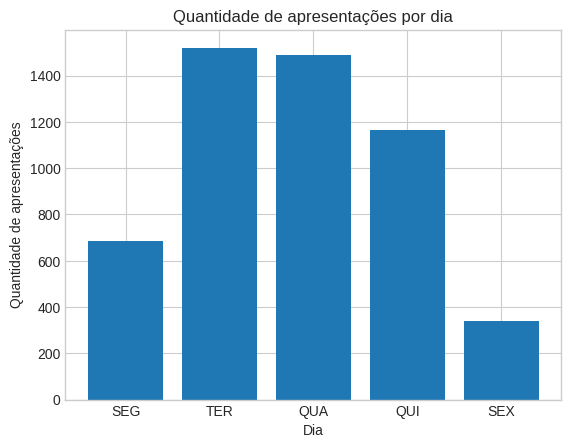

In [71]:
contagem = df['dia'].value_counts()

contagem = contagem.reindex(['SEG', 'TER', 'QUA', 'QUI', 'SEX'])

plt.bar(contagem.index, contagem.values)
plt.xlabel('Dia')
plt.ylabel('Quantidade de apresentações')
plt.title('Quantidade de apresentações por dia')

plt.show()

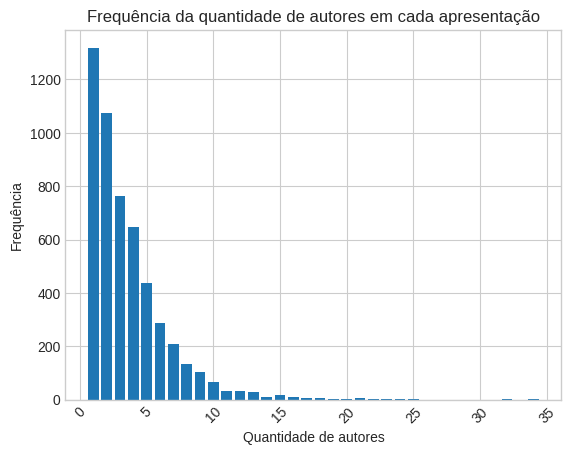

In [72]:
contagem = df['n_autores'].value_counts()

plt.bar(contagem.index, contagem.values)
plt.xlabel('Quantidade de autores')
plt.ylabel('Frequência')
plt.title(f'Frequência da quantidade de autores em cada apresentação')
plt.xticks(rotation=45)
plt.show()

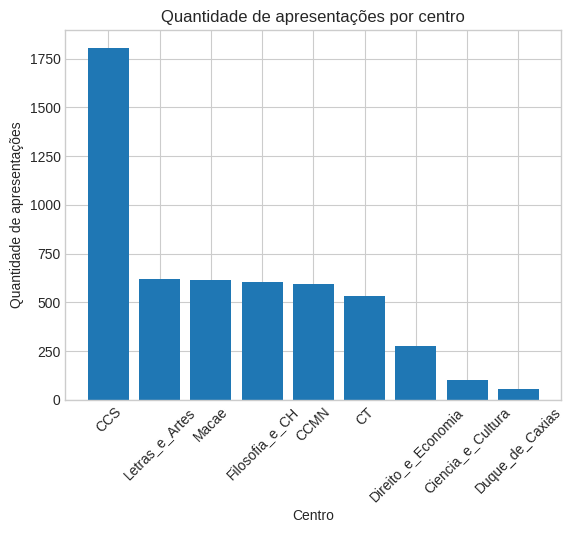

In [73]:
contagem = df['centro'].replace({
    'Filosofia_e_Ciencias_Humanas': 'Filosofia_e_CH',
    'Ciencias_Juridicas_e_Economicas': 'Direito_e_Economia'
}).value_counts()

plt.bar(contagem.index, contagem.values)
plt.xlabel('Centro')
plt.ylabel('Quantidade de apresentações')
plt.title('Quantidade de apresentações por centro')

plt.xticks(rotation=45)

plt.show()

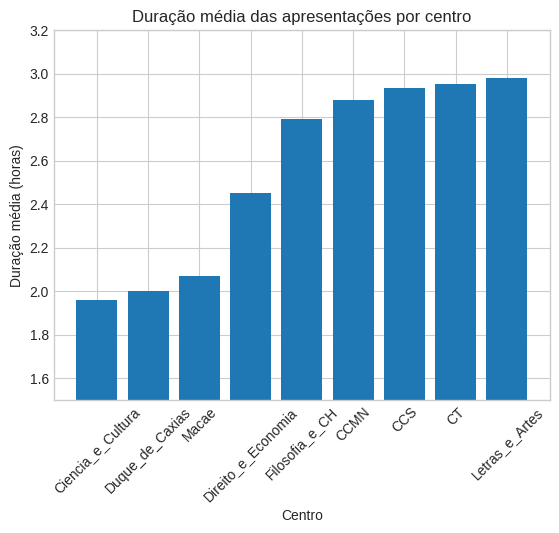

In [74]:
df_grafico = df.copy()
df_grafico['centro'] = df['centro'].replace({
    'Filosofia_e_Ciencias_Humanas': 'Filosofia_e_CH',
    'Ciencias_Juridicas_e_Economicas': 'Direito_e_Economia'
})

media_duracao = (
    df_grafico.groupby('centro')['duracao_horas']
      .mean()
      .sort_values()
)

plt.bar(media_duracao.index, media_duracao.values)
plt.xlabel('Centro')
plt.ylabel('Duração média (horas)')
plt.title('Duração média das apresentações por centro')
plt.xticks(rotation=45)
plt.ylim(1.5, 3.2)
plt.show()

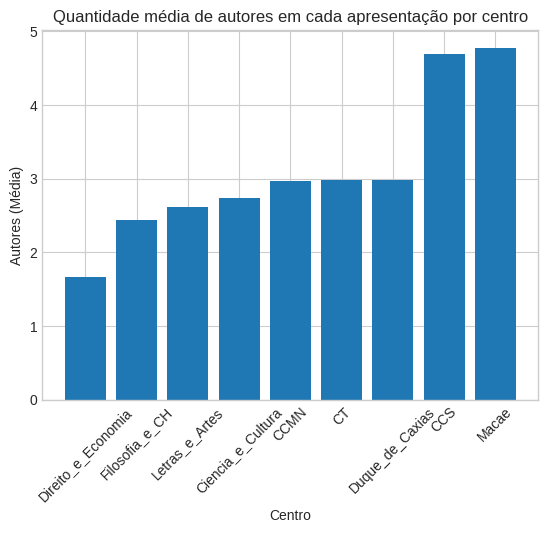

In [75]:
df.groupby('centro')['n_autores'].mean().sort_values()

media_autores = (
    df_grafico.groupby('centro')['n_autores']
      .mean()
      .sort_values()
)

plt.bar(media_autores.index, media_autores.values)
plt.xlabel('Centro')
plt.ylabel('Autores (Média)')
plt.title('Quantidade média de autores em cada apresentação por centro')
plt.xticks(rotation=45)
plt.show()

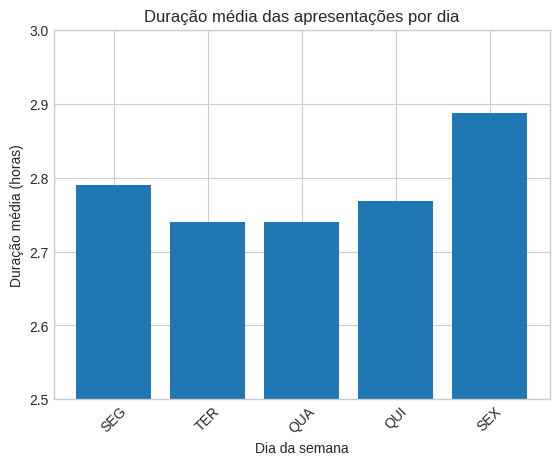

In [76]:
media_horas = df.groupby('dia')['duracao_horas'].mean()
media_horas = media_horas.reindex(['SEG', 'TER', 'QUA', 'QUI', 'SEX'])

plt.bar(media_horas.index, media_horas.values)
plt.xlabel('Dia da semana')
plt.ylabel('Duração média (horas)')
plt.title('Duração média das apresentações por dia')
plt.xticks(rotation=45)
plt.ylim(2.5, 3)
plt.show()

In [77]:
df[['duracao_horas', 'n_autores']].describe()

,duracao_horas,n_autores
count,5205.000000,5205.000000
mean,2.762344,3.602882
std,0.427040,3.012916
min,1.000000,1.000000
25%,3.000000,1.000000
50%,3.000000,3.000000
75%,3.000000,5.000000
max,3.000000,34.000000
